quantiles 5.162080350654941e-08 8.594422394593074e-05
139638
quantiles 7.958463972523117e-08 9.836169729413856e-05
139639
quantiles 1.3861657191265644e-07 0.00011284133982596603
139638
quantiles 1.6203090265009198e-08 7.706132079377342e-05
139639
quantiles 2.867929004337923e-08 8.992688072680936e-05
139639
quantiles 4.301450207544555e-08 0.0001062270259695852
139639
quantiles 8.007514352554674e-09 6.590129082263886e-05
139639
quantiles 1.2951365436367606e-08 7.631009465161725e-05
139638
quantiles 2.274054269602949e-08 9.282158432469753e-05
139639
quantiles 1.2205071809767857e-06 0.00044420159332325476
139003
quantiles 1.8844243577825137e-06 0.0005298571255373752
138999
quantiles 2.024574279609264e-06 0.0005914539224532085
138999
quantiles 7.3762366811713e-07 0.0004640694592277538
139003
quantiles 1.1253008108102453e-06 0.0005597637497199907
139001
quantiles 1.5247166422003788e-06 0.0006306488241519136
139002
quantiles 3.982928526792051e-07 0.0004231956204301191
139007
quantiles 6.63133

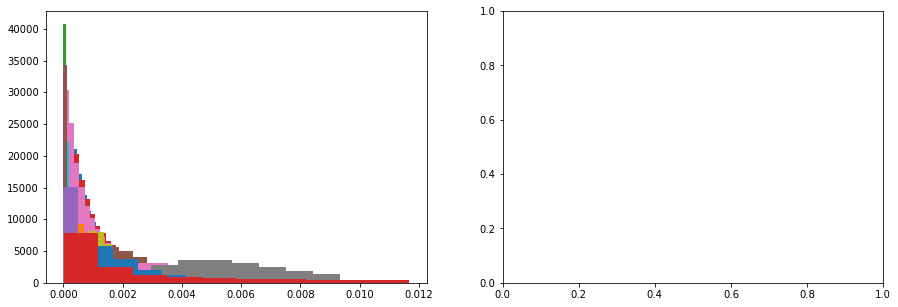

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import seaborn as sns
from scipy import stats

%matplotlib inline


def getPWList(inf):
    vel = []
    ang = []
    tngE = []
    nrmE = []
    totEList = []
    data = []
    totNrmE = 0
    totTangE = 0
    totE = 0
    tm = 0.
    with open(inf.strip()) as f:
        count = 0
        
        for line in f:
            if(count > 0):
                if(line.strip().split()[0] == "Time"):
                    tm = float(line.split()[1])
                if(tm > 0.0):
                    if(line.strip().split()[0] != "Time"):
                        cnt = int(line.split()[1])
                        x = 1.e3*float(line.split()[5])
                        z = 1.e3*float(line.split()[7])
                        r = np.sqrt(x**2+z**2)
                        v = float(line.split()[2])
                        if(count > 0 and cnt < 2):
                            # Angle between normal and velocity in radians
                            rad = float(line.split()[3])
                            
                            r = 0.5*1e-3*float(line.split()[4])
                            m = (4./3.)*8050*np.pi*r**3

                            nE = 0.5*m*(v*np.cos(rad))**2
                            tE = 0.5*m*(v*np.sin(rad))**2
#                             nrmE.append(nE)
#                             tngE.append(tE)
#                             totNrmE += nE
#                             totTangE += tE
                            totE = np.sqrt(nE**2+tE**2)
#                             totEList.append(np.sqrt(nE**2+tE**2))
#                             vel.append(v)
                            # Angle between impact velocity and contact surface 
                            theta = 90 - (180./np.pi)*float(line.split()[3])
                            
                            #theta = float(line.split()[3])
#                             if(theta > 0):
#                                 ang.append(theta)
#                             ls.append(float(line.split()[2]))
                            data.append([v,theta,nE,tE,totE])
    
            count += 1
    return ([tm,data])


def getPPList(inf):
    vel = []
    ang = []
    tngE = []
    nrmE = []
    totEList = []
    totNrmE = 0
    totTangE = 0
    totE = 0
    data = []
    tm = 0.
    with open(inf.strip()) as f:
        v = theta = nE = tE = nE = tE = totE = 0
        count = 0
        
        for line in f:
            if(count > 0):
                if(line.split()[0] == 'Time'):
                    tm = float(line.split()[1])

                if(tm > 0.0):
                    if(line.split()[0] != "Time"):
                        x = 1.e3*float(line.split()[6])
                        z = 1.e3*float(line.split()[8])
                        r = np.sqrt(x**2+z**2)
                        v = float(line.split()[4])
                        if(count > 1):
                            # Angle between normal and velocity in radians
                            rad = float(line.split()[5])
                            
                            r1 = 0.5*1e-3*float(line.split()[2])
                            r2 = 0.5*1e-3*float(line.split()[3])
                            r = r1*r2/(r1+r2)
                            m = (4./3.)*8050.0*np.pi*r**3
                            
                            nE = 0.5*m*(v*np.cos(rad))**2
                            tE = 0.5*m*(v*np.sin(rad))**2
#                             nrmE.append(nE)
#                             tngE.append(tE)
#                             totNrmE += nE
#                             totTangE += tE
                            totE = np.sqrt(nE**2+tE**2)
#                             totEList.append(np.sqrt(nE**2+tE**2))
#                             vel.append(v)
                            # Angle between impact velocity and contact surface 
                            theta = 90 - (180./np.pi)*float(line.split()[5])
                            
                            #theta = float(line.split()[3])
#                             if(theta > 0.5):
#                                 ang.append(theta)
                            data.append([v,theta,nE,tE,totE])
            count += 1
    return ([tm,data])



def boxPlot(df, var, fig, axes, qmin, qmax):
    # Filter data 
    q_low = df[var].quantile(qmin)
    q_hi  = df[var].quantile(qmax)
    
    print('quantiles', q_low,q_hi)
    
    df_filt = df[(df[var] < q_hi) & (df[var] > q_low)]
#     sns.boxplot(df_filt[var])
#     sns.boxplot(ax=axes[0],data=df_filt[var])
    return df_filt

def rugPlot(df, var, fig, axes):
    sns.rugplot(ax=axes[1],data=df[var])
     

def plotDist(df_filt, var, fig, axes, xlb, ylb, lbl):
#     plt.yscale('log')
    axes[0].hist(df_filt[var])
#     sns.distplot(df[var]) # plot kde and shade
#     axes[0].set(xlabel=xlb, ylabel=ylb)
#     sns.kdeplot(df[var])
#     sns.kdeplot(ax=axes[0], data=df[var], bw=0.2) # plot only the line
#     sns.kdeplot(ax=axes[0], data=df[var], cumulative=True) # cumulative plot
#     sns.kdeplot(ax=axes[0], x=df['vz'], y=df['vx'], shade=True, cbar=True) # contour plot
   

path_list = ["E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/12.7mm/0.3J/0.5N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/12.7mm/0.3J/0.6N",
              "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/12.7mm/0.3J/0.7N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/12.7mm/0.4J/0.5N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/12.7mm/0.4J/0.6N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/12.7mm/0.4J/0.7N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/12.7mm/0.5J/0.5N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/12.7mm/0.5J/0.6N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/12.7mm/0.5J/0.7N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/19.05mm/0.3J/0.5N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/19.05mm/0.3J/0.6N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/19.05mm/0.3J/0.7N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/19.05mm/0.4J/0.5N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/19.05mm/0.4J/0.6N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/19.05mm/0.4J/0.7N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/19.05mm/0.5J/0.5N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/19.05mm/0.5J/0.6N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/19.05mm/0.5J/0.7N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/25.4mm/0.3J/0.5N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/25.4mm/0.3J/0.6N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/25.4mm/0.3J/0.7N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/25.4mm/0.4J/0.5N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/25.4mm/0.4J/0.6N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/25.4mm/0.4J/0.7N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/25.4mm/0.5J/0.5N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/25.4mm/0.5J/0.6N",
             "E:/drum/density/8000/ppsf/0.1/damp/0.1/pwsf/0.4/508mm/25.4mm/0.5J/0.7N"]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
var = 'totE'

xlb = 'Velocity (m/s)'
xlb = '$GT (m/s)^{2}$'
xlb = 'Impact Energy (J)'
ylb = 'Probability Density'
lbl = '254mm'

pp_ie = []
# Get PP impact energy
for ls in path_list:
    fin = os.path.join(ls, '_pp-impact.dat')
    data = getPPList(fin)
    df = pd.DataFrame(data[1], columns=['v','theta','nE','tE','totE'])
    # Box plot
    df_filt = boxPlot(df, var, fig, axes, 0.001, 0.7)
    print(len(df_filt[var]))
    plotDist(df_filt, var, fig, axes, xlb, ylb, '254mm')
    pp_ie.append(df_filt[var].sum()/float(data[0]))

pw_ie = []
# Get PW impact energy
for ls in path_list:
    fin = os.path.join(ls, 'pw-impact.dat')
    data = getPWList(fin)
    df = pd.DataFrame(data[1], columns=['v','theta','nE','tE','totE'])
    # Box plot
    df_filt = boxPlot(df, var, fig, axes, 0.001, 0.7)
    print(len(df_filt[var]))
    plotDist(df_filt, var, fig, axes, xlb, ylb, '254mm')
    pw_ie.append(df_filt[var].sum()/float(data[0]))

df_out = pd.DataFrame({'list':path_list,'pp_ie':pp_ie, 'pw_ie':pw_ie})
print(len(df_out))

fout = "../../drum/paper/data/impactenergy.csv" 
df_out.to_csv(fout)

# plotCellData(df_filt, var, fig, axes, xlb, ylb, lbl)
# Plot Distribution
# plotDist(df_filt, var, fig, axes, xlb, ylb, '254mm')
# fout = os.path.join(path, "impactE.jpg")
# fig.savefig(fout, dpi=300)

print('DONE')



In [ ]:
# sns.rugplot(df[var])

# # Set up the x-axis for the plot
# x_min = df_filt[var].min()
# x_max = df_filt[var].max()

# print(x_min)

# # 100 equally spacced points from x_min to m_max
# x_axis = np.linspace(x_min,x_max,100)

# # From Wikipedia
# bandwidth = ((4*df[var].std()**5)/(3*len(df[var])))**2

# # Create an empty kernal list
# kernal_list = []


# for data_point in df[var]:
#     # Create a kernal for each point and append to list
#     kernal = stats.norm(data_point,bandwidth).pdf(x_axis)
#     kernal_list.append(kernal)
# #     print(kernal.max())
    
#     # Scale for plotting
#     if(kernal.max() > 0):
#         kernal = kernal/kernal.max()
#         kernal = kernal*.4
#         plt.plot(x_axis, kernal, color='gray', alpha=0.5)
    
    
# plt.ylim(0,1)

In [ ]:
# plotDist(df['vel'])

In [ ]:
# inf = os.path.join(path, "pw-impact.dat")
# (v1, ang1, nrmE1, tngE1, totNE, totTE,totE, totElist) = getPWList(inf)

# inf = os.path.join(path, "pp-impact.dat")
# data = getPPList(inf)

# df2 = pd.DataFrame(data, columns=['v','theta','nE','tE','nE','tE','totE'])
# print(df2.head())

# selected = df['cell'] == '551'
# if (selected): print(selected)
# df2 = df[selected]
# df2 = df
# print(df.tail())
# plt.plot(df2['gT'])

# gt = sns.load_dataset('tips')
# print(type(gt))

# sns.distplot(df['vx'], bins=60)
# sns.distplot(df['vy'], bins=60)
# sns.distplot(df['vz'], bins=60)
# sns.jointplot(x=df['vx'], y=df['gT'], data=df)

# Filter data 
# q_low = df["vx"].quantile(0.002)
# q_hi  = df["vx"].quantile(0.995)

# q_low = df["vx"].quantile(0.002)
# q_hi  = df["vx"].quantile(0.995)


# df_filtered = df2[(df2["tE"] < q_hi) & (df2["tE"] > q_low)]

# # sns.pairplot(df)
# sns.distplot(df2['nE'])
# sns.distplot(df2['tE'])
# sns.distplot(df2['totE'])
# sns.boxplot(data=df_filtered['gT'])
# sns.violinplot(data=df_filtered['gT'])